# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2 toc-item"><a href="#Import-packages-and-load-the-data" data-toc-modified-id="Import-packages-and-load-the-data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import packages and load the data</a></div><div class="lev3 toc-item"><a href="#Imports" data-toc-modified-id="Imports-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Imports</a></div><div class="lev3 toc-item"><a href="#Data" data-toc-modified-id="Data-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Data</a></div><div class="lev4 toc-item"><a href="#Simulation" data-toc-modified-id="Simulation-1121"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Simulation</a></div><div class="lev4 toc-item"><a href="#Real-Stars" data-toc-modified-id="Real-Stars-1122"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>Real Stars</a></div><div class="lev3 toc-item"><a href="#Initial-Plots" data-toc-modified-id="Initial-Plots-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Initial Plots</a></div><div class="lev4 toc-item"><a href="#Distance-from-us" data-toc-modified-id="Distance-from-us-1131"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Distance from us</a></div><div class="lev4 toc-item"><a href="#Surface-gravity" data-toc-modified-id="Surface-gravity-1132"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Surface gravity</a></div><div class="lev4 toc-item"><a href="#Temperature" data-toc-modified-id="Temperature-1133"><span class="toc-item-num">1.1.3.3&nbsp;&nbsp;</span>Temperature</a></div><div class="lev4 toc-item"><a href="#Metallicity" data-toc-modified-id="Metallicity-1134"><span class="toc-item-num">1.1.3.4&nbsp;&nbsp;</span>Metallicity</a></div><div class="lev4 toc-item"><a href="#Velocity-(v_r)" data-toc-modified-id="Velocity-(v_r)-1135"><span class="toc-item-num">1.1.3.5&nbsp;&nbsp;</span>Velocity ($v_r$)</a></div><div class="lev4 toc-item"><a href="#Velocity-(v_{phi})" data-toc-modified-id="Velocity-(v_{phi})-1136"><span class="toc-item-num">1.1.3.6&nbsp;&nbsp;</span>Velocity ($v_{\phi}$)</a></div><div class="lev4 toc-item"><a href="#Velocity-(v_{theta})" data-toc-modified-id="Velocity-(v_{theta})-1137"><span class="toc-item-num">1.1.3.7&nbsp;&nbsp;</span>Velocity ($v_{\theta}$)</a></div><div class="lev4 toc-item"><a href="#Position-on-the-sky" data-toc-modified-id="Position-on-the-sky-1138"><span class="toc-item-num">1.1.3.8&nbsp;&nbsp;</span>Position on the sky</a></div><div class="lev1 toc-item"><a href="#Preprocess-the-data" data-toc-modified-id="Preprocess-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocess the data</a></div><div class="lev2 toc-item"><a href="#Visualize" data-toc-modified-id="Visualize-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualize</a></div><div class="lev1 toc-item"><a href="#Build-the-initial-classifier" data-toc-modified-id="Build-the-initial-classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build the initial classifier</a></div><div class="lev2 toc-item"><a href="#The-model" data-toc-modified-id="The-model-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The model</a></div><div class="lev2 toc-item"><a href="#Training" data-toc-modified-id="Training-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Training</a></div><div class="lev2 toc-item"><a href="#Testing" data-toc-modified-id="Testing-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Testing</a></div><div class="lev1 toc-item"><a href="#Apply-to-the-real-stars" data-toc-modified-id="Apply-to-the-real-stars-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Apply to the real stars</a></div><div class="lev1 toc-item"><a href="#Transfer-learning" data-toc-modified-id="Transfer-learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transfer learning</a></div><div class="lev1 toc-item"><a href="#Apply-to-real-stars-again" data-toc-modified-id="Apply-to-real-stars-again-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Apply to real stars again</a></div>

# Introduction
This notebook explores some questions about transfer learning. In particular we would like to know:
  * What is transfer learning?
  * Why would we use it?
  * How to implement it [within keras]
  
For our particular examples we will examine how to find halo stars in the Milky Way. We will do machine learning on simulated galaxies, and transfer the results to real stars from the Milky Way. The simulated galaxies come from the [Galaxia package](http://galaxia.sourceforge.net). The real stars are measured by the [RAVE satellite](https://www.rave-survey.org) cross matched with [TGAS](https://www.rave-survey.org/project/documentation/dr5/rave_tgas/).

## Import packages and load the data
### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [3]:
# These are just my choices to make the plots look nice
plt.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### Data

#### Simulation

In [6]:
SimulatedStars = pd.read_csv('TrainGalaxy_1.csv',index_col=None)

In [7]:
SimulatedStars.head()

,Unnamed: 0,teff,grav,px,py,pz,r,phi,theta,vx,...,vz,vr,vphi,vtheta,rad,glon,glat,age,feh,popid
0,0,3.544803,5.034143,0.003173,0.030940,-0.001903,7.996898,3.137724,1.569159,-38.804165,...,-13.000776,28.526524,-214.937547,5.797503,0.031161,84.145332,-3.501677,7.709990,0.089004,0
1,1,3.534744,5.102462,0.008425,0.034560,-0.013621,7.991649,3.137268,1.570624,6.301945,...,-6.701699,-16.444503,-221.409715,-0.551139,0.038091,76.299309,-20.951927,7.916358,-0.033533,0
2,2,3.526476,5.077964,0.014836,0.017845,-0.007921,7.985187,3.139358,1.569910,-0.553901,...,-18.993921,-10.046263,-228.328417,11.735019,0.024521,50.260952,-18.845060,7.629419,0.236517,0
3,3,3.584646,4.914517,-0.000223,0.032497,-0.005683,8.000295,3.137531,1.569632,-13.340377,...,-6.189796,3.127480,-218.079709,-1.056563,0.032991,90.393547,-9.919882,7.843582,-0.080000,0
4,4,3.563856,5.012868,-0.018195,0.015251,-0.006770,8.018214,3.139691,1.569770,-22.386658,...,-3.115048,11.713755,-222.300370,-4.122931,0.024688,140.029602,-15.915027,7.871544,-0.054622,0


In [8]:
SimulatedStars.columns

Index(['Unnamed: 0', 'teff', 'grav', 'px', 'py', 'pz', 'r', 'phi', 'theta',
       'vx', 'vy', 'vz', 'vr', 'vphi', 'vtheta', 'rad', 'glon', 'glat', 'age',
       'feh', 'popid'],
      dtype='object')

In [9]:
SimulatedStars.shape

(2448212, 21)

The Halo stars are indicated by popid==8

In [10]:
SimulatedStars.query('popid==8').shape

(4201, 21)

We only have ~4000 stars which are our target out of the 2.5 million stars. We want to think about this when deciding the random split size for the training and testing.

#### Real Stars

In [11]:
RealStars = pd.read_csv('rave_tgas_cleaned_data.csv',index_col=0)

In [12]:
RealStars.head()

,ra,dec,b,l,logg,teff,gband,vr,vtheta,vphi,...,pmde_err,vU,vV,vW,vU_err,vV_err,vW_err,jband,kband,R_cyl
0,160.760542,-13.241389,39.009388,261.198041,4.02,6047.5,11.154045,-22.767779,-8.553811,-212.108962,...,1.109520,2.989305,-26.186428,0.468133,7.397238,2.740294,3.563465,10.313,9.981,8.059333
1,160.258125,-13.640972,38.394644,261.014525,1.92,4777.9,10.940921,-90.714933,13.228575,-160.400080,...,1.039390,59.797612,-69.816238,-28.596837,21.613296,8.263897,9.739697,9.513,8.868,8.191753
2,159.117958,-13.938889,37.476591,260.143047,3.76,5684.4,9.964015,17.192325,-17.679071,-209.065014,...,0.630677,-32.337603,-30.413529,10.738150,2.762826,0.893481,1.207606,9.107,8.738,8.030682
3,159.159667,-13.473472,37.865498,259.816167,3.75,5896.4,9.740564,-19.469996,-8.870117,-223.389139,...,0.576193,4.840963,-15.400051,1.330989,1.266904,0.713310,0.745443,8.843,8.585,8.024455
4,160.152417,-11.347833,40.129253,259.072345,2.50,4867.2,10.547413,3.542314,-11.618539,-209.717951,...,0.690997,-31.966993,-30.385995,4.604890,10.842726,1.868670,4.019525,9.129,8.482,8.166834


In [13]:
RealStars.columns

Index(['ra', 'dec', 'b', 'l', 'logg', 'teff', 'gband', 'vr', 'vtheta', 'vphi',
       'vr_err', 'vphi_err', 'vtheta_err', 'z', 'z_err', 'distance',
       'distance_err', 'R', 'feH', 'ID', 'hrv', 'hrv_err', 'pmra', 'pmra_err',
       'pmde', 'pmde_err', 'vU', 'vV', 'vW', 'vU_err', 'vV_err', 'vW_err',
       'jband', 'kband', 'R_cyl'],
      dtype='object')

In [14]:
RealStars.shape

(164387, 35)

### Initial Plots
Here we make plots of some of the different features. Some of them seem consistent between simulation and data, while others do not.

In [15]:
SimulatedStars['distance'] = np.sqrt((SimulatedStars['px'])**2 +
                                     (SimulatedStars['py'])**2 +
                                     (SimulatedStars['pz'])**2
                                     )

#### Distance from us

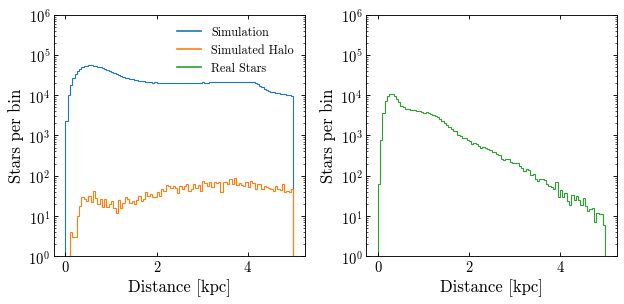

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['distance'], bins=100, range=(0,5), histtype='step', color='C0')
plt.hist(SimulatedStars.query('popid==8')['distance'], bins=100, range=(0,5), histtype='step', color='C1')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.legend(loc='best', frameon=False, fontsize=11)
plt.ylim(1e0,1e6)
plt.xlabel('Distance [kpc]')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(RealStars['distance'], bins=100, range=(0,5), histtype='step', color='C2')
plt.ylim(1e0,1e6)
plt.xlabel('Distance [kpc]')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.tight_layout()

These don't match well, but are probably worth using. Range is at least the same.

#### Surface gravity

In [15]:
SimulatedStars['logg'] = SimulatedStars['grav']

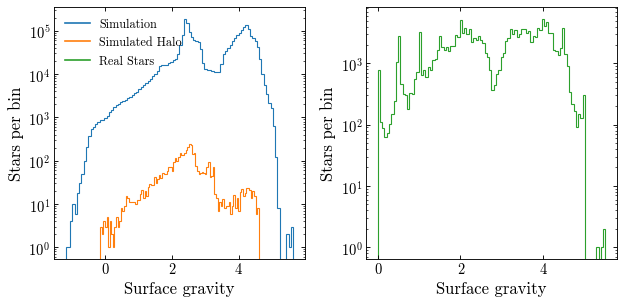

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['logg'], bins=100, histtype='step')
plt.hist(SimulatedStars.query('popid==8')['logg'], bins=100, histtype='step')

plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.legend(loc='upper left', frameon=False, fontsize=11)
plt.xlabel('Surface gravity')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(RealStars['logg'], bins=100, histtype='step', color='C2')
plt.xlabel('Surface gravity')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.tight_layout()

The halo stars behave different than the other stars in simulation. Real data has similar-ish shape, but some peaks and noise.

#### Temperature

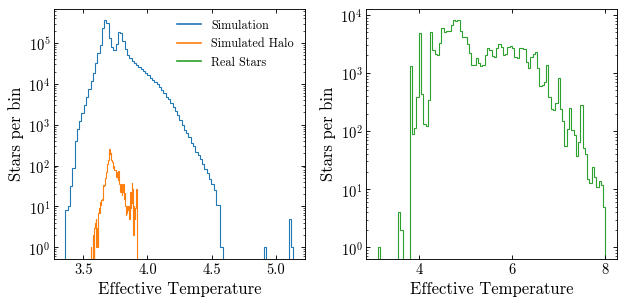

In [17]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['teff'], bins=100, histtype='step', color='C0')
plt.hist(SimulatedStars.query('popid==8')['teff'], bins=100, histtype='step', color='C1')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.legend(loc='best', frameon=False, fontsize=11)
plt.xlabel('Effective Temperature')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(RealStars['teff']/1000, bins=100, histtype='step', color='C2')
plt.xlabel('Effective Temperature')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.tight_layout()

These do not seem to cover the same range. I would leave these out of the classifier.

#### Metallicity

Note that in `RealStars` the metallicity uses a capital H

In [18]:
SimulatedStars['feH'] = SimulatedStars['feh']

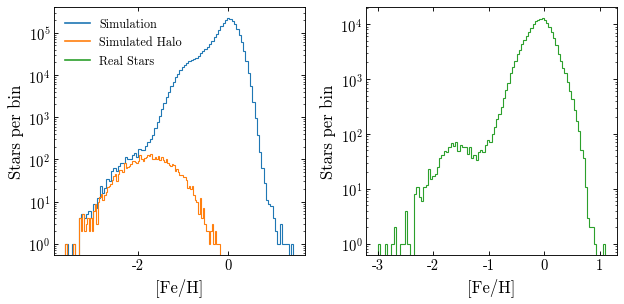

In [19]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['feH'], bins=100, histtype='step', color='C0')
plt.hist(SimulatedStars.query('popid==8')['feH'], bins=100, histtype='step', color='C1')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')

plt.legend(loc='upper left', frameon=False, fontsize=11)
plt.xlabel('[Fe/H]')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(RealStars['feH'], bins=100, histtype='step', color='C2')
plt.xlabel('[Fe/H]')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.tight_layout()

This seems to be a unique distribution for the Halo stars in simulation. Note that the real data has a slightly wider range.

#### Velocity ($v_r$)

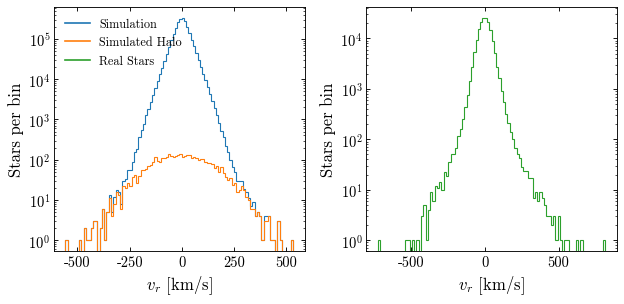

In [20]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['vr'], bins=100, histtype='step', color='C0')
plt.hist(SimulatedStars.query('popid==8')['vr'], bins=100, histtype='step', color='C1')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.xlabel('$v_r$ [km/s]')
plt.legend(loc='upper left', frameon=False, fontsize=11)
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(RealStars['vr'], bins=100, histtype='step', color='C2')
plt.xlabel('$v_r$ [km/s]')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.tight_layout()

#### Velocity ($v_{\phi}$)

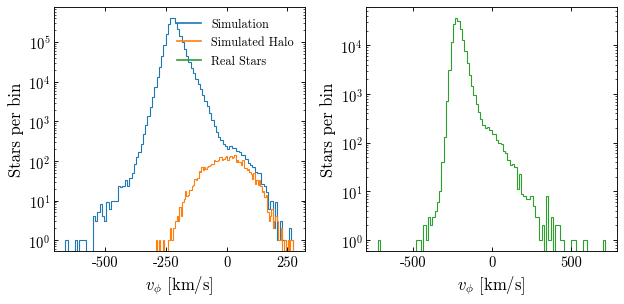

In [21]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['vphi'], bins=100, histtype='step', color='C0')
plt.hist(SimulatedStars.query('popid==8')['vphi'], bins=100, histtype='step', color='C1')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.xlabel('$v_{\phi}$ [km/s]')
plt.legend(loc='upper right', frameon=False, fontsize=11)
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(RealStars['vphi'], bins=100, histtype='step', color='C2')
plt.xlabel('$v_{\phi}$ [km/s]')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.tight_layout()

#### Velocity ($v_{\theta}$)

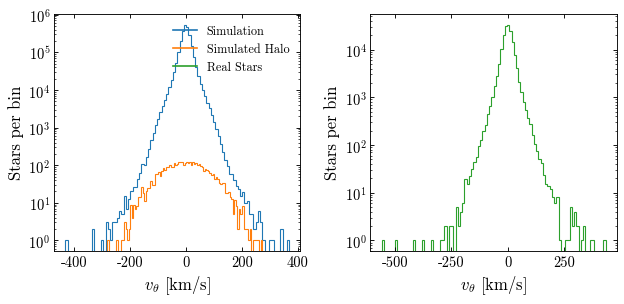

In [22]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['vtheta'], bins=100, histtype='step', color='C0')
plt.hist(SimulatedStars.query('popid==8')['vtheta'], bins=100, histtype='step', color='C1')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.xlabel(r'$v_{\theta}$ [km/s]')
plt.legend(loc='upper right', frameon=False, fontsize=11)
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(RealStars['vtheta'], bins=100, histtype='step', color='C2')
plt.xlabel(r'$v_{\theta}$ [km/s]')
plt.ylabel('Stars per bin')
plt.yscale('log')

plt.tight_layout()

#### Position on the sky

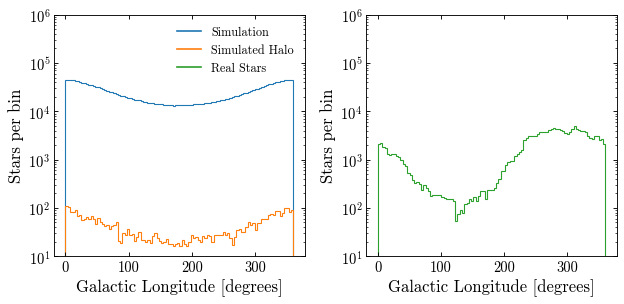

In [23]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['glon'], bins=100, range=(0,360), histtype='step')
plt.hist(SimulatedStars.query('popid==8')['glon'], bins=100, range=(0,360), histtype='step')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.xlabel('Galactic Longitude [degrees]')
plt.ylabel('Stars per bin')
plt.yscale('log')
plt.ylim(1e1, 1e6)
plt.legend(loc='best', frameon=False, fontsize=11)

plt.subplot(1,2,2)
plt.hist(RealStars['l'], bins=100, range=(0,360), histtype='step', color='C2')
plt.xlabel('Galactic Longitude [degrees]')
plt.ylabel('Stars per bin')
plt.yscale('log')
plt.ylim(1e1, 1e6)

plt.tight_layout()

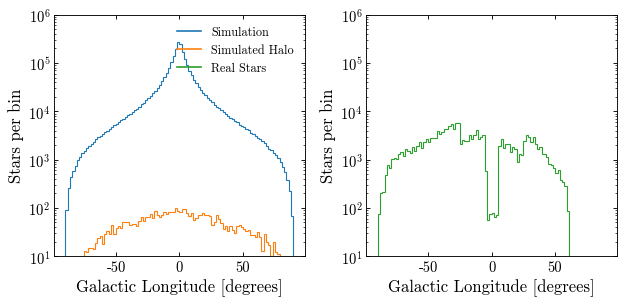

In [24]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(SimulatedStars['glat'], bins=100, range=(-90, 90), histtype='step')
plt.hist(SimulatedStars.query('popid==8')['glat'], bins=100, range=(-90, 90), histtype='step')
plt.plot([], [], label='Simulation', color='C0')
plt.plot([], [], label='Simulated Halo', color='C1')
plt.plot([], [], label='Real Stars', color='C2')
plt.xlabel('Galactic Longitude [degrees]')
plt.ylabel('Stars per bin')
plt.yscale('log')
plt.ylim(1e1, 1e6)
plt.legend(loc='best', frameon=False, fontsize=11)

plt.subplot(1,2,2)
plt.hist(RealStars['b'], bins=100, range=(-90, 90), histtype='step', color='C2')
plt.xlabel('Galactic Longitude [degrees]')
plt.ylabel('Stars per bin')
plt.yscale('log')
plt.ylim(1e1, 1e6)

plt.tight_layout()

Why are these so different? Plot these using the healpy package

In [25]:
# !pip install healpy

In [26]:
import healpy as hp

In [27]:
SimulatedStars['l'] = SimulatedStars['glon']
SimulatedStars['b'] = SimulatedStars['glat']

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


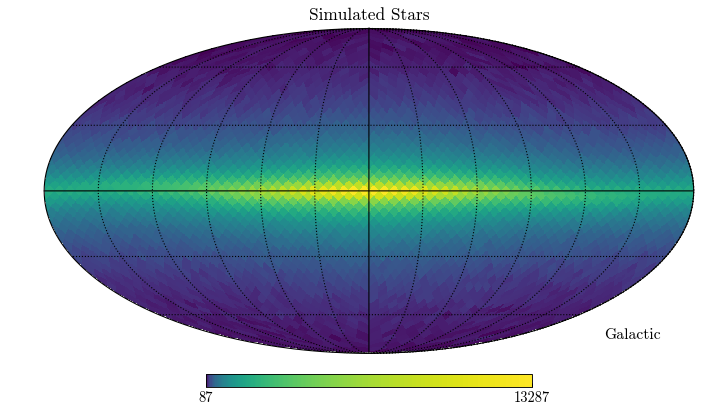

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


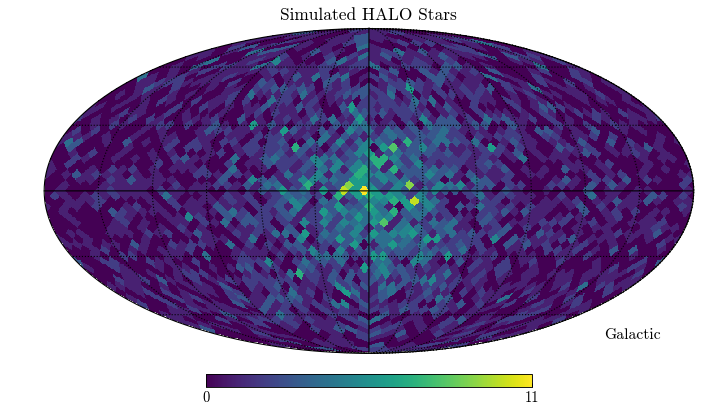

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


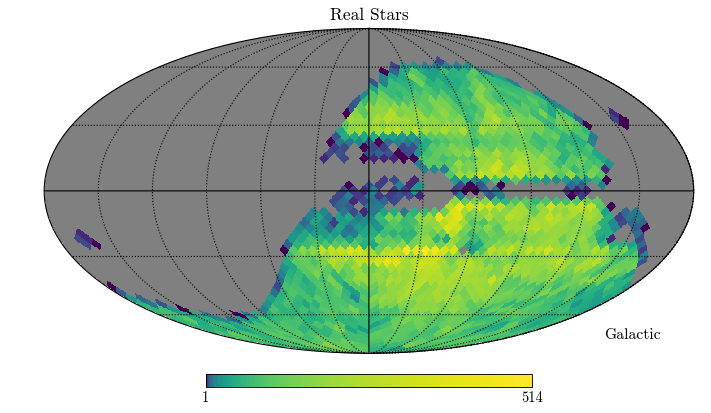

In [28]:
nside = 16
catalog_map = np.zeros(hp.nside2npix(nside))

pixels = hp.ang2pix(nside, SimulatedStars['l'], SimulatedStars['b'], lonlat=True)
for pix in pixels:
    catalog_map[pix] += 1
    
hp.mollview(catalog_map, title="Simulated Stars", cbar=True, norm='Log', coord='G')
hp.graticule()
plt.show()

nside = 16
catalog_map = np.zeros(hp.nside2npix(nside))

pixels = hp.ang2pix(nside, SimulatedStars.query('popid==8')['l'], SimulatedStars.query('popid==8')['b'], lonlat=True)
for pix in pixels:
    catalog_map[pix] += 1
# catalog_map[catalog_map == 0] = hp.UNSEEN
hp.mollview(catalog_map, title="Simulated HALO Stars", cbar=True, coord='G')
hp.graticule()
plt.show()

nside = 16
catalog_map = np.zeros(hp.nside2npix(nside))

pixels = hp.ang2pix(nside, RealStars['l'], RealStars['b'], lonlat=True)
for pix in pixels:
    catalog_map[pix] += 1
catalog_map[catalog_map == 0] = hp.UNSEEN   
hp.mollview(catalog_map, title="Real Stars", cbar=True, norm='log', coord='G')
hp.graticule()

plt.show()

From these initial plots, we see that the simulation seems to do a good job of describing many of the observables in the dataset. However, they are not exactly the same. Does it seem reasonable that a classifier trained on the simulation will be able to be applied (and trusted) to the real data?

# Preprocess the data

To start the procedure, we first want to train a network to distinguish the halo stars in simulation as well as possible. Many of the features are not of the same scale, so we can help the training process by scaling the data. For this, we will use the standard scaler of [scikit-learn](https://scikit-learn.org/stable/). We will also split the simulation into training and test data.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
# What columns to use?
use_cols = ['distance', 'logg', 'vr', 'vphi', 'vtheta', 'l', 'b']
# Make the design matrix
X = SimulatedStars[use_cols].values
Y = (SimulatedStars['popid'] == 8).values.reshape(-1,1)

Split into testing and training set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [32]:
print(X_train.shape)
print(y_train.shape)
print('There are {0} halo stars in the training set'.format(np.sum(y_train)))
print()
print(X_test.shape)
print(y_test.shape)
print('There are {0} halo stars in the test set'.format(np.sum(y_test)))

(1958569, 7)
(1958569, 1)
There are 3329 halo stars in the training set

(489643, 7)
(489643, 1)
There are 872 halo stars in the test set


Now scale the data so that the training set features have 0 mean and unit variance

In [33]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)

In [34]:
# Now scale the test data using the same mean and standard deviation as found with the training data
X_test = SS.transform(X_test)

## Visualize
Visualize to check for issues

/Users/bryan/anaconda/envs/p3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
  MathTextWarning)


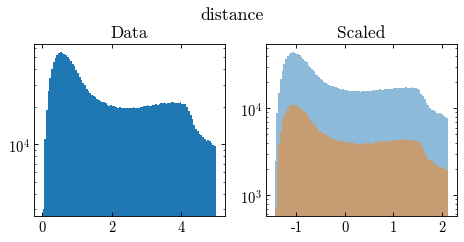

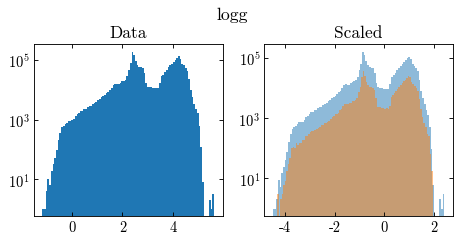

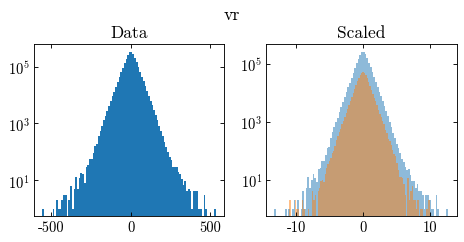

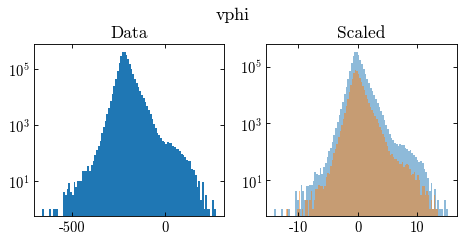

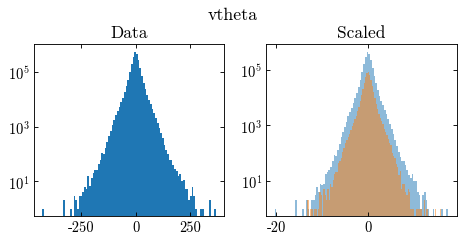

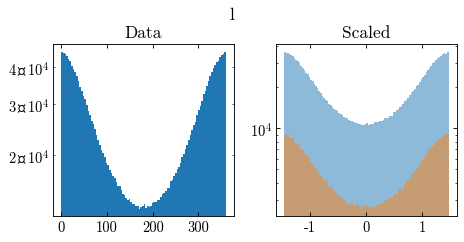

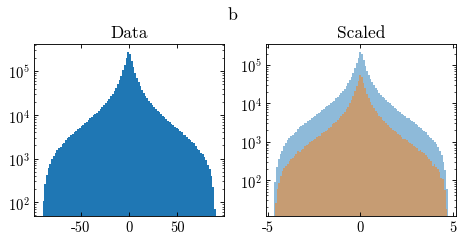

In [35]:
for i, col in enumerate(use_cols):
    plt.figure(figsize=(6, 3))
    plt.subplot(1,2,1)
    plt.hist(SimulatedStars[col], bins=100)
    plt.yscale('log')
    plt.title('Data')
    
    plt.subplot(1,2,2)
    plt.hist(X_train[:, i], bins=100, alpha=0.5)
    plt.hist(X_test[:, i], bins=100, alpha=0.5)
    plt.yscale('log')
    plt.title('Scaled')
    
    plt.suptitle(col, y=1.01, fontsize=16)
    
    plt.tight_layout()

Note that the shapes look the same, but the x_values are now in similar ranges for all of the features.

# Build the initial classifier

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

Using TensorFlow backend.


## The model

In [37]:
MyModel = Sequential()
MyModel.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))
MyModel.add(Dense(units=20, activation='relu'))
MyModel.add(Dense(units=10, activation='relu'))
MyModel.add(Dense(units=5, activation='relu'))
MyModel.add(Dense(units=1, activation='sigmoid'))
MyModel.compile(loss='binary_crossentropy',
                optimizer='adam'
               )

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
MyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


## Training

In [39]:
checkpointer = ModelCheckpoint('ClassifierSimulatedStars.h5', save_best_only=True, verbose=True)
es = EarlyStopping(patience=2, restore_best_weights=True)

In [40]:
history = MyModel.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=50,
                      batch_size=8192,
                      callbacks=[checkpointer, es]
                     )

Instructions for updating:
Use tf.cast instead.
Train on 1566855 samples, validate on 391714 samples
Epoch 1/50
1566855/1566855 [==============================] - 7s 4us/step - loss: 0.1970 - val_loss: 0.0243

Epoch 00001: val_loss improved from inf to 0.02432, saving model to ClassifierSimulatedStars.h5
Epoch 2/50
1566855/1566855 [==============================] - 5s 3us/step - loss: 0.0167 - val_loss: 0.0115

Epoch 00002: val_loss improved from 0.02432 to 0.01147, saving model to ClassifierSimulatedStars.h5
Epoch 3/50
1566855/1566855 [==============================] - 5s 3us/step - loss: 0.0087 - val_loss: 0.0071

Epoch 00003: val_loss improved from 0.01147 to 0.00711, saving model to ClassifierSimulatedStars.h5
Epoch 4/50
1566855/1566855 [==============================] - 5s 3us/step - loss: 0.0059 - val_loss: 0.0052

Epoch 00004: val_loss improved from 0.00711 to 0.00516, saving model to ClassifierSimulatedStars.h5
Epoch 5/50
1566855/1566855 [==============================] - 5s 3u

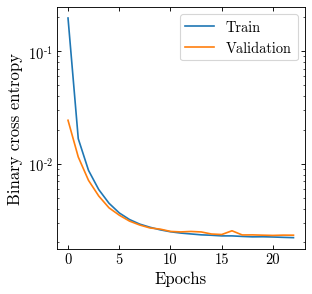

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Binary cross entropy')
plt.legend(['Train', 'Validation'])
plt.show()

## Testing

In [42]:
# predict the scores for the test set, then histogram them based on the real labels
test_preds = MyModel.predict(X_test)

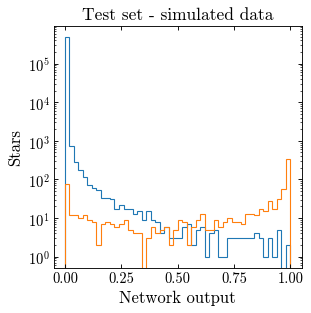

In [43]:
plt.hist(test_preds[y_test==0], bins=50, range=(0,1), histtype='step')
plt.hist(test_preds[y_test==1], bins=50, range=(0,1), histtype='step')
plt.xlabel('Network output')
plt.ylabel('Stars')
plt.title('Test set - simulated data')
plt.yscale('log')
plt.show()

The network provides very good separation of the halo stars and the non-halo stars. Compute the ROC curve

In [44]:
from sklearn.metrics import roc_curve, auc

In [45]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=test_preds
                                )

In [46]:
my_auc = auc(fpr, tpr)

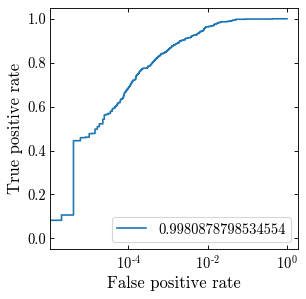

In [47]:
plt.plot(fpr, tpr, label=my_auc)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xscale('log')
plt.show()

# Apply to the real stars
Now that we have a network which is excellent at separating the stars, test to see how it does on the real stars. For this, we will need to make a new design matrix. Do that here using the `use_cols` from above.

In [48]:
X_real = RealStars[use_cols].values

Transorm using `SS.transform`

In [49]:
X_real_scaled = SS.transform(X_real)

Now make the predictions

In [50]:
real_preds = MyModel.predict(X_real_scaled)

Okay, now we have the predictions, but how do we know if they are any good or not? We don't have a label to make our test metrics with. As a first check, lets make the same histogram.

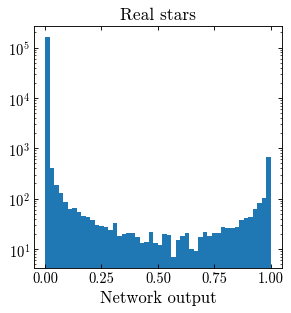

In [51]:
plt.hist(real_preds, bins=50, range=(0,1))
plt.title('Real stars')
plt.xlabel('Network output')
plt.yscale('log')
plt.show()

This actually looks pretty similar to the simulation! For now, let's call all stars with a score > 0.75 an accreted star, and plot their distributions.

In [52]:
NewLabels = (real_preds > 0.5).reshape(-1,1)

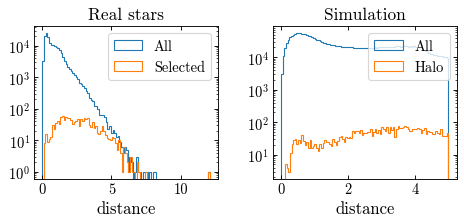

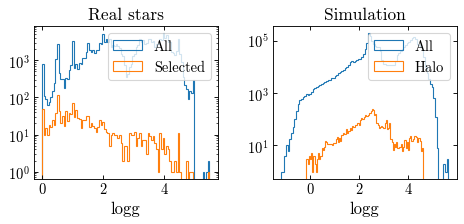

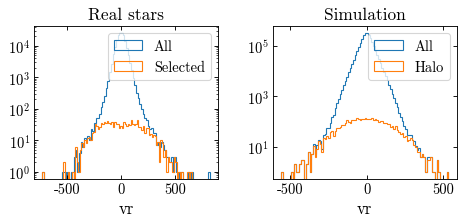

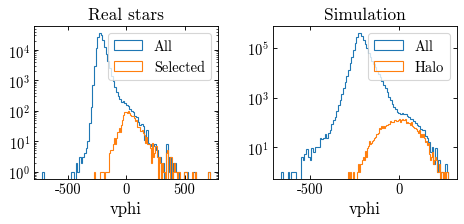

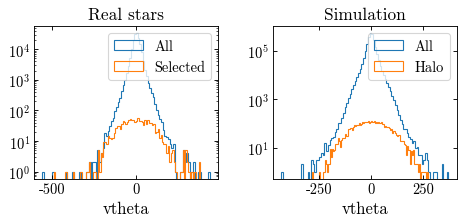

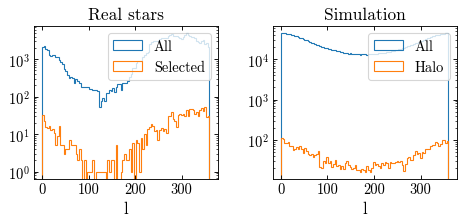

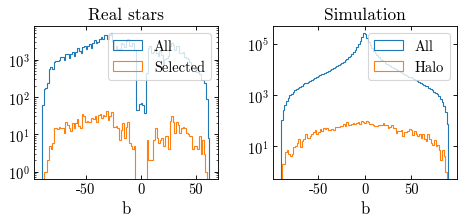

In [53]:
for col in use_cols:
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.hist(RealStars[col], bins=100, histtype='step')
    plt.hist(RealStars[NewLabels == 1][col], bins=100, histtype='step')
    plt.xlabel(col)
    plt.legend(['All', 'Selected'])
    plt.yscale('log')
    plt.title('Real stars')
    
    plt.subplot(1, 2, 2)
    plt.hist(SimulatedStars[col], bins=100, histtype='step')
    plt.hist(SimulatedStars.query('popid==8')[col], bins=100, histtype='step')
    plt.xlabel(col)
    plt.legend(['All', 'Halo'])
    plt.yscale('log')
    plt.title('Simulation')
    
    plt.tight_layout(w_pad=2)

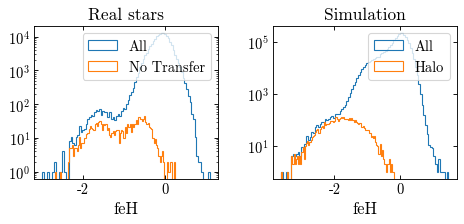

In [57]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.hist(RealStars['feH'], bins=100, histtype='step')
plt.hist(RealStars[NewLabels == 1]['feH'], bins=100, histtype='step')
plt.xlabel('feH')
plt.legend(['All', 'No Transfer', 'Transfer'])
plt.yscale('log')
plt.title('Real stars')

plt.subplot(1, 2, 2)
plt.hist(SimulatedStars['feH'], bins=100, histtype='step')
plt.hist(SimulatedStars.query('popid==8')['feH'], bins=100, histtype='step')
plt.xlabel('feH')
plt.legend(['All', 'Halo'])
plt.yscale('log')
plt.title('Simulation')

plt.tight_layout(w_pad=2)

In [54]:
print('There are {0} stars that get classified out of the total {1} stars in the real data'.format(np.sum(NewLabels),
                                                                                                   len(NewLabels)
                                                                                                   )
      )

There are 1370 stars that get classified out of the total 164387 stars in the real data


Note that the distributions of the real stars is not idential to the simulation. This may teach us about the distribution of stars in our own galaxy, where we do not have truth-level labels. However, we didn't use any information about our own galaxy for training. Is there a way that we can add in some information, even if we don't know truth labels?

# Transfer learning

To use real data in the training step, we need to have a set of stars which we are pretty certain we can label by hand. For instance, looking back at the data, if we use [Fe/H] $< -2$, we are very likely going to select a halo star. However, this will have a low True Positive Rate, because many of the halo stars have values of [Fe/H] greater than this.

Because of this, we do not want to train a network from scratch. Instead, we will take the network which was trained on the simulated galaxy, and only allow for small changes. In fact, we can even *freeze* some of the layers, so that they cannot change. The allows the _features_ learned by the network on the simulated data to stay the same, but we change _how_ we use those features based on real stars.

In [58]:
TransferLabel = ((RealStars['feH'] < -1.8) & (np.abs(RealStars['z']/1000) > 1.5)).values
print('{0} stars used for the transfer label'.format(np.sum(TransferLabel)))

144 stars used for the transfer label


In [59]:
class_weights = {0: 1,
                 1: len(TransferLabel)/np.sum(TransferLabel)/10
                }

In [60]:
class_weights

{0: 1, 1: 114.1576388888889}

Now we need to make a copy of the network and then freeze the first layers.

In [61]:
from keras.models import load_model

In [62]:
TransferNetwork = load_model('ClassifierSimulatedStars.h5')
TransferNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


We want to only allow the last weights to change.

In [63]:
TransferNetwork.layers[0].trainable = False
TransferNetwork.layers[1].trainable = False
TransferNetwork.layers[2].trainable = False
TransferNetwork.layers[3].trainable = False

In [64]:
TransferNetwork.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4))

In [65]:
TransferNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 851
Trainable params: 6
Non-trainable params: 845
_________________________________________________________________


In [66]:
transferHistory = TransferNetwork.fit(X_real_scaled, TransferLabel,
                                      validation_split=0.25,
                                      epochs=50,
                                      class_weight=class_weights,
                                      callbacks=[es]
                                     )

Train on 123290 samples, validate on 41097 samples
Epoch 1/50
123290/123290 [==============================] - 12s 98us/step - loss: 0.1760 - val_loss: 0.1400
Epoch 2/50
123290/123290 [==============================] - 10s 83us/step - loss: 0.1650 - val_loss: 0.1318
Epoch 3/50
123290/123290 [==============================] - 10s 81us/step - loss: 0.1565 - val_loss: 0.1260
Epoch 4/50
123290/123290 [==============================] - 12s 100us/step - loss: 0.1491 - val_loss: 0.1207
Epoch 5/50
123290/123290 [==============================] - 14s 112us/step - loss: 0.1435 - val_loss: 0.1167
Epoch 6/50
123290/123290 [==============================] - 10s 84us/step - loss: 0.1390 - val_loss: 0.1136
Epoch 7/50
123290/123290 [==============================] - 12s 98us/step - loss: 0.1353 - val_loss: 0.1108
Epoch 8/50
123290/123290 [==============================] - 16s 127us/step - loss: 0.1323 - val_loss: 0.1088
Epoch 9/50
123290/123290 [==============================] - 12s 100us/step - loss:

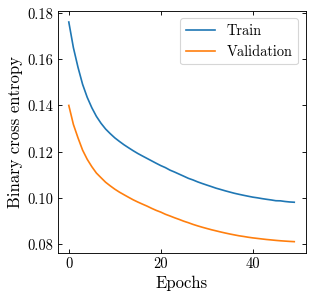

In [67]:
plt.plot(transferHistory.history['loss'])
plt.plot(transferHistory.history['val_loss'])
# plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Binary cross entropy')
plt.legend(['Train', 'Validation'])
plt.show()

In [68]:
TransferNetwork.save('TransferNetwork.h5')

# Apply to real stars again

In [69]:
transfer_preds = TransferNetwork.predict(X_real_scaled)

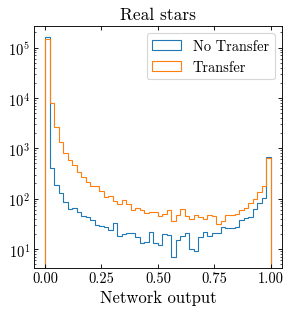

In [70]:
plt.hist(real_preds, bins=50, range=(0,1), histtype='step')
plt.hist(transfer_preds, bins=50, range=(0,1), histtype='step')
plt.legend(['No Transfer', 'Transfer'])
plt.title('Real stars')
plt.xlabel('Network output')
plt.yscale('log')
plt.show()

In [71]:
FinalLabels = (transfer_preds > 0.5).reshape(-1,1)

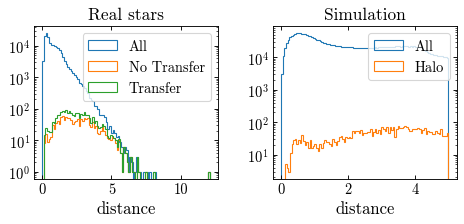

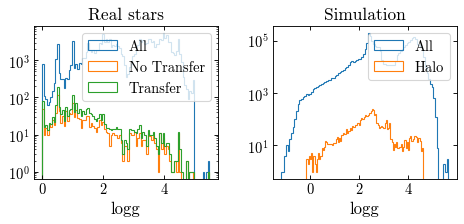

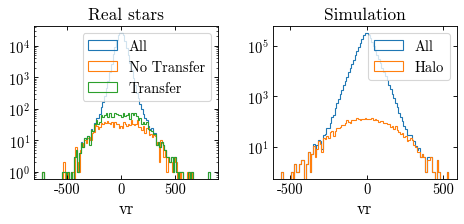

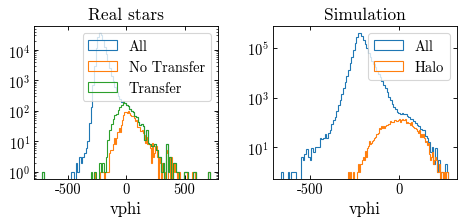

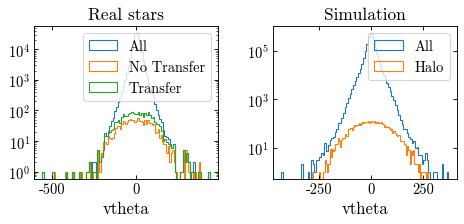

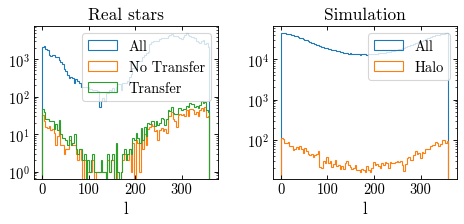

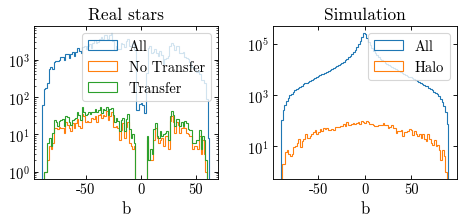

In [72]:
for col in use_cols:
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.hist(RealStars[col], bins=100, histtype='step')
    plt.hist(RealStars[NewLabels == 1][col], bins=100, histtype='step')
    plt.hist(RealStars[FinalLabels == 1][col], bins=100, histtype='step')
    plt.xlabel(col)
    plt.legend(['All', 'No Transfer', 'Transfer'])
    plt.yscale('log')
    plt.title('Real stars')
    
    plt.subplot(1, 2, 2)
    plt.hist(SimulatedStars[col], bins=100, histtype='step')
    plt.hist(SimulatedStars.query('popid==8')[col], bins=100, histtype='step')
    plt.xlabel(col)
    plt.legend(['All', 'Halo'])
    plt.yscale('log')
    plt.title('Simulation')
    
    plt.tight_layout(w_pad=2)

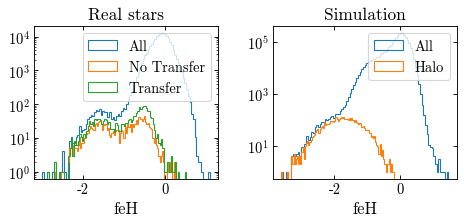

In [73]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.hist(RealStars['feH'], bins=100, histtype='step')
plt.hist(RealStars[NewLabels == 1]['feH'], bins=100, histtype='step')
plt.hist(RealStars[FinalLabels == 1]['feH'], bins=100, histtype='step')
plt.xlabel('feH')
plt.legend(['All', 'No Transfer', 'Transfer'])
plt.yscale('log')
plt.title('Real stars')

plt.subplot(1, 2, 2)
plt.hist(SimulatedStars['feH'], bins=100, histtype='step')
plt.hist(SimulatedStars.query('popid==8')['feH'], bins=100, histtype='step')
plt.xlabel('feH')
plt.legend(['All', 'Halo'])
plt.yscale('log')
plt.title('Simulation')

plt.tight_layout(w_pad=2)

In [74]:
SimulatedStars.columns

Index(['Unnamed: 0', 'teff', 'grav', 'px', 'py', 'pz', 'r', 'phi', 'theta',
       'vx', 'vy', 'vz', 'vr', 'vphi', 'vtheta', 'rad', 'glon', 'glat', 'age',
       'feh', 'popid', 'distance', 'logg', 'feH', 'l', 'b'],
      dtype='object')

In [76]:
TestStars = SimulatedStars[['px', 'py', 'pz',
                            'r', 'phi', 'theta', 'vr', 'vphi', 'vtheta',
                            'distance', 'l', 'b', 
                            'teff', 'logg','feH', 'popid'
                           ]]

In [77]:
TestStars.to_csv('/Users/bryan/Desktop/MLClass/SimulatedGalaxy.csv', index=False)

In [78]:
TestStars = pd.read_csv('/Users/bryan/Desktop/MLClass/SimulatedGalaxy.csv', index_col=False)

In [79]:
TestStars.head()

,px,py,pz,r,phi,theta,vr,vphi,vtheta,distance,l,b,teff,logg,feH,popid
0,0.003173,0.030940,-0.001903,7.996898,3.137724,1.569159,28.526524,-214.937547,5.797503,0.031161,84.145332,-3.501677,3.544803,5.034143,0.089004,0
1,0.008425,0.034560,-0.013621,7.991649,3.137268,1.570624,-16.444503,-221.409715,-0.551139,0.038091,76.299309,-20.951927,3.534744,5.102462,-0.033533,0
2,0.014836,0.017845,-0.007921,7.985187,3.139358,1.569910,-10.046263,-228.328417,11.735019,0.024521,50.260952,-18.845060,3.526476,5.077964,0.236517,0
3,-0.000223,0.032497,-0.005683,8.000295,3.137531,1.569632,3.127480,-218.079709,-1.056563,0.032991,90.393547,-9.919882,3.584646,4.914517,-0.080000,0
4,-0.018195,0.015251,-0.006770,8.018214,3.139691,1.569770,11.713755,-222.300370,-4.122931,0.024688,140.029602,-15.915027,3.563856,5.012868,-0.054622,0


In [80]:
RealStars.columns

Index(['ra', 'dec', 'b', 'l', 'logg', 'teff', 'gband', 'vr', 'vtheta', 'vphi',
       'vr_err', 'vphi_err', 'vtheta_err', 'z', 'z_err', 'distance',
       'distance_err', 'R', 'feH', 'ID', 'hrv', 'hrv_err', 'pmra', 'pmra_err',
       'pmde', 'pmde_err', 'vU', 'vV', 'vW', 'vU_err', 'vV_err', 'vW_err',
       'jband', 'kband', 'R_cyl'],
      dtype='object')

In [81]:
RealStars.to_csv('/Users/bryan/Desktop/MLClass/RAVE_TGAS.csv', index=False)